In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sn
from sklearn import metrics
import matplotlib.pyplot as plt

<h2>Import data set<h2>

In [3]:
data=pd.read_csv("complete_data.csv")
data
# 0 - Fibrilacion Atrial
# 1 - Congestión cardíaca
# 2 - Infarto al miocardio

,case,record,cond,ae_m,ae_v,se_m,se_v,hfd_m,hfd_v,dfa_m,dfa_v,psd_m,psd_v,Unnamed: 0
0,p080120,3406983_0002,0,1.168396,0.004582,0.964767,0.009790,2.070072,0.000166,0.172803,0.000307,0.520330,0.000906,NaN
1,p080120,3406983_0003,0,1.047608,0.042369,0.802464,0.049698,2.090014,0.000189,0.154892,0.000404,0.468682,0.001764,NaN
2,p080120,3406983_0007,0,1.135748,0.032810,0.831941,0.067280,2.085422,0.000052,0.148726,0.000284,0.431369,0.001633,NaN
3,p080120,3406983_0009,0,1.089244,0.049727,0.849848,0.069910,2.091715,0.000124,0.178373,0.003703,0.485346,0.006567,NaN
4,p080120,3406983_0011,0,0.839026,0.103725,0.625933,0.097401,2.113146,0.003489,0.166810,0.002794,0.441605,0.007855,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15112,p093900,3830735_0011,1,0.781379,0.039406,0.604919,0.070200,2.088072,0.000423,0.212267,0.004820,0.552899,0.005583,7.0
15113,p093900,3830735_0013,1,0.742207,0.035708,0.617933,0.041877,2.093576,0.000966,0.185574,0.005470,0.482693,0.011504,8.0
15114,p093900,3830735_0019,1,0.516458,0.008824,0.305300,0.006787,2.075331,0.000292,0.250197,0.000718,0.448389,0.004131,9.0
15115,p094007,3433819_0001,1,1.432638,0.001476,1.410608,0.010145,2.057172,0.000205,0.253336,0.000756,0.586211,0.000665,0.0


<h2>Extract Non linear analysis<h2>

In [4]:
pathology = data[["cond","ae_m","ae_v","se_m","se_v","hfd_m","hfd_v","dfa_m","dfa_v","psd_m","psd_v"]]
random = pathology.sample(n=15117,random_state=1)
random

,cond,ae_m,ae_v,se_m,se_v,hfd_m,hfd_v,dfa_m,dfa_v,psd_m,psd_v
13618,1,0.996047,0.037387,0.777091,0.038516,2.082666,0.000184,0.228997,0.003225,0.593321,0.001914
9510,2,1.459295,0.175903,1.638195,0.241155,1.991713,0.000108,0.673738,0.014856,1.131975,0.009051
12168,2,0.658485,0.151137,0.519892,0.128562,2.064308,0.000248,0.132142,0.000642,0.522143,0.003944
407,0,0.438528,0.017924,0.447324,0.044488,2.117136,0.003463,0.091575,0.001196,0.588862,0.000578
6116,1,0.997368,0.006219,0.874161,0.006626,2.087007,0.000035,0.220928,0.000596,0.434514,0.001098
...,...,...,...,...,...,...,...,...,...,...,...
905,0,0.409361,0.029466,0.346849,0.035472,2.155621,0.008646,0.188374,0.019490,0.485818,0.028506
5192,1,0.866734,0.027653,0.675285,0.016848,2.099799,0.000121,0.217027,0.003732,0.549319,0.004379
12172,2,0.589101,0.035249,0.422407,0.028428,2.062609,0.000913,0.436668,0.003187,0.815490,0.004594
235,0,1.104599,0.018100,0.908868,0.028744,2.075963,0.000091,0.288457,0.001361,0.614435,0.001108


<h2>Define train set and targets<h2>

In [267]:
a_f=pathology[pathology["cond"] ==0]
c_c=pathology[pathology["cond"] ==1][0:1190]
m_i=pathology[pathology["cond"] ==2]

atrial_f=a_f[["ae_m","ae_v","se_m","se_v","hfd_m","hfd_v","dfa_m","dfa_v","psd_m","psd_v"]]
congestive_h=c_c[["ae_m","ae_v","se_m","se_v","hfd_m","hfd_v","dfa_m","dfa_v","psd_m","psd_v"]]
myocardial_i=m_i[["ae_m","ae_v","se_m","se_v","hfd_m","hfd_v","dfa_m","dfa_v","psd_m","psd_v"]]

targets=a_f['cond'].tolist()+c_c['cond'].tolist()
X=pd.concat([atrial_f,congestive_h],ignore_index=True)
X

,ae_m,ae_v,se_m,se_v,hfd_m,hfd_v,dfa_m,dfa_v,psd_m,psd_v
0,1.168396,0.004582,0.964767,0.009790,2.070072,0.000166,0.172803,0.000307,0.520330,0.000906
1,1.047608,0.042369,0.802464,0.049698,2.090014,0.000189,0.154892,0.000404,0.468682,0.001764
2,1.135748,0.032810,0.831941,0.067280,2.085422,0.000052,0.148726,0.000284,0.431369,0.001633
3,1.089244,0.049727,0.849848,0.069910,2.091715,0.000124,0.178373,0.003703,0.485346,0.006567
4,0.839026,0.103725,0.625933,0.097401,2.113146,0.003489,0.166810,0.002794,0.441605,0.007855
...,...,...,...,...,...,...,...,...,...,...
2375,0.357847,0.035040,0.190519,0.015951,2.144276,0.005715,0.101033,0.001521,0.207355,0.006349
2376,0.276208,0.039963,0.163872,0.020853,2.275718,0.023954,0.073387,0.004340,0.177670,0.022851
2377,0.200050,0.030465,0.074932,0.004391,2.210002,0.010103,0.104876,0.003652,0.170984,0.011248
2378,0.136144,0.012872,0.061115,0.003265,2.263422,0.013864,0.118609,0.007931,0.160450,0.012134


<h2>Histograms<h2>

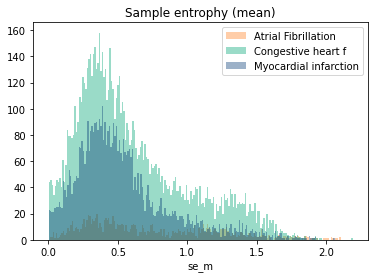

In [79]:
se_af=a_f["se_m"]
se_cc=c_c["se_m"]
se_mi=m_i["se_m"]


sn.distplot(a=se_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=se_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=se_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("Sample entrophy (mean)")
plt.legend()


(0.0, 0.4)

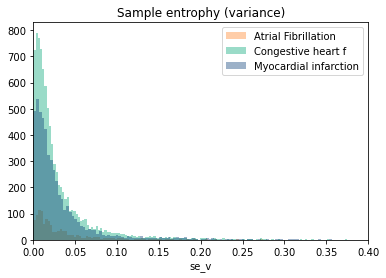

In [94]:
sev_af=a_f["se_v"]
sev_cc=c_c["se_v"]
sev_mi=m_i["se_v"]


sn.distplot(a=sev_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=sev_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=sev_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("Sample entrophy (variance)")
plt.legend()
plt.xlim(0, 0.4)

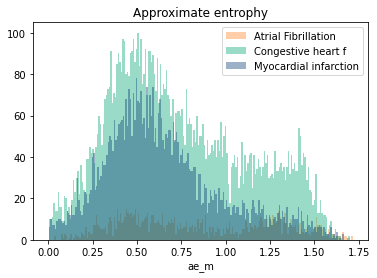

In [74]:
aem_af=a_f["ae_m"]
aem_cc=c_c["ae_m"]
aem_mi=m_i["ae_m"]

#myColors = ['#083D77','#f4633a','#ffd757']

sn.distplot(a=aem_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=aem_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=aem_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("Approximate entrophy (mean)")
plt.legend()


(0.0, 0.2)

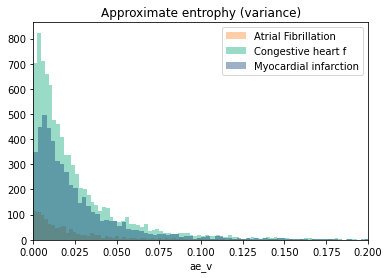

In [93]:
aev_af=a_f["ae_v"]
aev_cc=c_c["ae_v"]
aev_mi=m_i["ae_v"]

#myColors = ['#083D77','#f4633a','#ffd757']

sn.distplot(a=aev_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=aev_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=aev_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("Approximate entrophy (variance)")
plt.legend()
plt.xlim(0, 0.2)

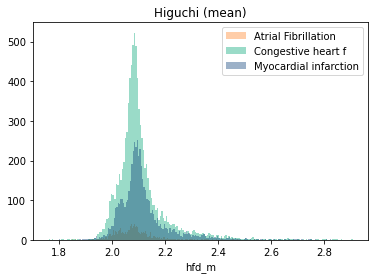

In [85]:
hfd_af=a_f["hfd_m"]
hfd_cc=c_c["hfd_m"]
hfd_mi=m_i["hfd_m"]


sn.distplot(a=hfd_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=hfd_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=hfd_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("Higuchi (mean)")
plt.legend()

(0.0, 0.015)

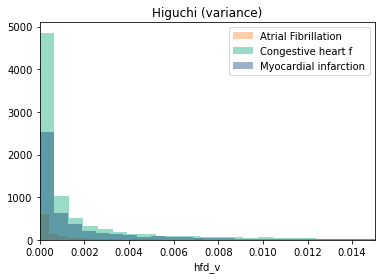

In [95]:
hfdv_af=a_f["hfd_v"]
hfdv_cc=c_c["hfd_v"]
hfdv_mi=m_i["hfd_v"]


sn.distplot(a=hfdv_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=hfdv_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=hfdv_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("Higuchi (variance)")
plt.legend()
plt.xlim(0, 0.015)

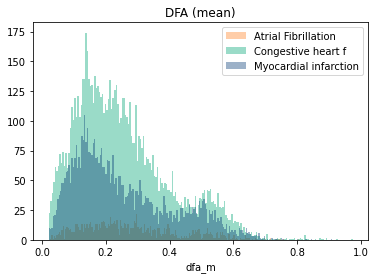

In [84]:
dfa_af=a_f["dfa_m"]
dfa_cc=c_c["dfa_m"]
dfa_mi=m_i["dfa_m"]


sn.distplot(a=dfa_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=dfa_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=dfa_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("DFA (mean)")
plt.legend()

(0.0, 0.04)

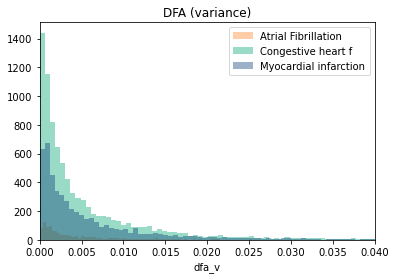

In [96]:
dfav_af=a_f["dfa_v"]
dfav_cc=c_c["dfa_v"]
dfav_mi=m_i["dfa_v"]


sn.distplot(a=dfav_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=dfav_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=dfav_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("DFA (variance)")
plt.legend()
plt.xlim(0, 0.04)

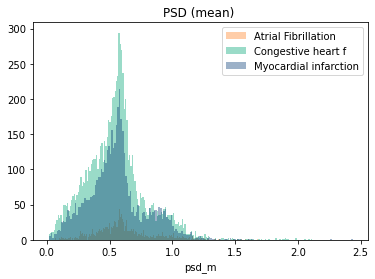

In [87]:
psd_af=a_f["psd_m"]
psd_cc=c_c["psd_m"]
psd_mi=m_i["psd_m"]


sn.distplot(a=psd_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=psd_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=psd_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("PSD (mean) ")
plt.legend()

(0.0, 0.2)

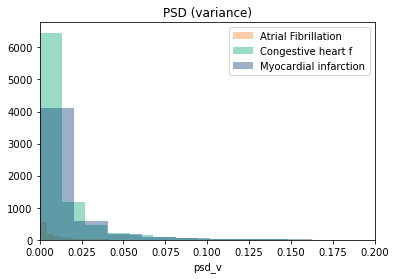

In [90]:
psdv_af=a_f["psd_v"]
psdv_cc=c_c["psd_v"]
psdv_mi=m_i["psd_v"]


sn.distplot(a=psdv_af,bins=200,color='#FF8427',kde=False,label="Atrial Fibrillation")
sn.distplot(a=psdv_cc,bins=200,color='#04A777',kde=False,label="Congestive heart f")
sn.distplot(a=psdv_mi,bins=200,color='#083D77',kde=False,label="Myocardial infarction")

plt.title("PSD (variance)")
plt.legend()
plt.xlim(0, 0.2)

<h2>Train and datasets<h2>

In [268]:
X_train,X_test,y_train,y_test = train_test_split(X,targets,test_size=0.20,random_state=1)
print(len(X_train))
print(len(y_train))

1904
1904


<h2>Logistic regression function<h2>

In [269]:
logistic_regression= LogisticRegression(max_iter=20000)
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)
y_test=np.array(y_test)

<h2>Confussion matrix<h2>

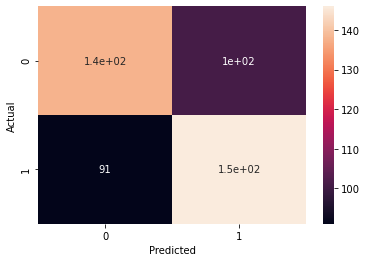

In [270]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

<h2>Accuracy<h2>

In [271]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))


Accuracy:  0.5966386554621849


<h2>K nearest neightbors<h2>

In [272]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_scaled, y_train)

#Checking performance on the training set
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
#Checking performance on the test set
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))



Accuracy of K-NN classifier on training set: 0.82
Accuracy of K-NN classifier on test set: 0.66


<h2>Gaussian Naive Bayes<h2>

In [278]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" 
      % (X_test.shape[0], (y_test != y_pred).sum()))
acc=1-(y_test != y_pred).sum()/X_test.shape[0]
print("Accuracy : ", acc)

Number of mislabeled points out of a total 476 points : 184
Accuracy :  0.6134453781512605


<h2>Complement Naive Bayes<h2>

In [279]:
from sklearn.naive_bayes import ComplementNB

cnb = ComplementNB()
y_pred = cnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" 
      % (X_test.shape[0], (y_test != y_pred).sum()))
acc=1-(y_test != y_pred).sum()/X_test.shape[0]
print("Accuracy : ", acc)

Number of mislabeled points out of a total 476 points : 198
Accuracy :  0.5840336134453781


<h2>Multinomial Naive Bayes<h2>

In [280]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
y_pred = mnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" 
      % (X_test.shape[0], (y_test != y_pred).sum()))
acc=1-(y_test != y_pred).sum()/X_test.shape[0]
print("Accuracy : ", acc)

Number of mislabeled points out of a total 476 points : 198
Accuracy :  0.5840336134453781


<h2>Bernoulli Naive Bayes<h2>

In [282]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
y_pred = bnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" 
      % (X_test.shape[0], (y_test != y_pred).sum()))
acc=1-(y_test != y_pred).sum()/X_test.shape[0]
print("Accuracy : ", acc)

Number of mislabeled points out of a total 476 points : 239
Accuracy :  0.49789915966386555
